In [28]:
import torch
import numpy as np
import os, sys
sys.path.append("../")
import darknet
from detect import detect_with_model
from PIL import Image, ImageDraw
from matplotlib import pyplot as plt
from tqdm import tqdm
import pandas as pd
from os import path as osp
from matplotlib.patches import Rectangle

In [2]:
vot_path = "/data/vot2016/"
results_path = "heatmap_results/"

In [3]:
model = darknet.Darknet("../cfg/yolo.cfg")
model = model.cuda()
try:
    model.load_weights("../yolo.weights")
except:
    !wget http://pjreddie.com/media/files/yolo.weights
    !mv yolo.weights ..
    model.load_weights("../yolo.weights")
    

In [4]:
dataset_folders = [os.path.join(vot_path, x) for x in os.listdir(vot_path) if os.path.isdir(os.path.join(vot_path, x))]

In [12]:
for folder in dataset_folders:
    images = sorted([os.path.join(folder, x) for x in os.listdir(folder) if x.endswith(".jpg")])
    print(folder)
    res = []
            
    classname = folder.split('/')[-1]
    
    for n in tqdm(range(len(images))):
        _boxes = detect_with_model(model=model, image=images[n], verbose=0)
        for box in _boxes:
            _box = []
            for b in box:
                if type(b) == list:
                    _box += b
                elif type(b) == float:
                    _box += [b]
                elif type(b) == int:
                    _box += [b + 0.0]
                else:
                    try:
                        _box += b.tolist()
                    except:
                        _box += [float(b)]
            res.append([n] + _box)
    print('\n'.join([','.join([str(y) for y in x]) for x in res]), 
          file=open(os.path.join(results_path, classname) + ".csv", "a+"))

  0%|          | 0/392 [00:00<?, ?it/s]../utils.py:153: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  cls_confs = torch.nn.Softmax()(Variable(output[5:5 + num_classes].transpose(0, 1))).data
  1%|          | 4/392 [00:00<00:10, 36.83it/s]

/data/vot2016/soccer1


  1%|          | 4/558 [00:00<00:16, 34.08it/s]

/data/vot2016/road


  3%|▎         | 6/201 [00:00<00:03, 57.35it/s]

/data/vot2016/sphere


  4%|▍         | 5/120 [00:00<00:02, 49.31it/s]

/data/vot2016/glove


  1%|          | 5/999 [00:00<00:24, 41.31it/s]

/data/vot2016/nature


  5%|▌         | 5/100 [00:00<00:01, 49.84it/s]

/data/vot2016/matrix


  4%|▍         | 4/105 [00:00<00:03, 30.67it/s]

/data/vot2016/ball1


  2%|▏         | 6/366 [00:00<00:06, 51.54it/s]

/data/vot2016/fish1


  4%|▍         | 5/131 [00:00<00:02, 45.82it/s]

/data/vot2016/singer3


  5%|▌         | 4/76 [00:00<00:02, 34.16it/s]

/data/vot2016/bmx


  3%|▎         | 5/175 [00:00<00:03, 49.29it/s]

/data/vot2016/book


  2%|▏         | 6/365 [00:00<00:07, 51.03it/s]

/data/vot2016/shaking


  2%|▏         | 6/251 [00:00<00:04, 56.40it/s]

/data/vot2016/sheep


  0%|          | 5/1500 [00:00<00:32, 46.68it/s]

/data/vot2016/girl


  1%|          | 7/567 [00:00<00:08, 62.82it/s]

/data/vot2016/gymnastics1


  4%|▎         | 6/164 [00:00<00:02, 53.08it/s]

/data/vot2016/motocross1


  2%|▏         | 6/310 [00:00<00:05, 51.93it/s]

/data/vot2016/fish2


  2%|▏         | 5/292 [00:00<00:06, 45.44it/s]

/data/vot2016/fernando


  2%|▏         | 4/191 [00:00<00:05, 32.06it/s]

/data/vot2016/traffic


  4%|▍         | 6/151 [00:00<00:02, 50.73it/s]

/data/vot2016/butterfly


 10%|▉         | 4/41 [00:00<00:01, 32.17it/s]

/data/vot2016/ball2


  2%|▏         | 4/201 [00:00<00:06, 30.54it/s]

/data/vot2016/marching


  5%|▌         | 7/140 [00:00<00:02, 64.15it/s]

/data/vot2016/pedestrian1


  1%|          | 5/742 [00:00<00:16, 44.03it/s]

/data/vot2016/car1


  4%|▍         | 6/158 [00:00<00:03, 50.21it/s]

/data/vot2016/rabbit


  1%|          | 5/402 [00:00<00:08, 44.94it/s]

/data/vot2016/handball2


  3%|▎         | 4/131 [00:00<00:03, 34.45it/s]

/data/vot2016/crossing


  2%|▏         | 6/312 [00:00<00:05, 55.19it/s]

/data/vot2016/tunnel


  3%|▎         | 6/196 [00:00<00:03, 58.22it/s]

/data/vot2016/bag


  3%|▎         | 7/225 [00:00<00:03, 62.77it/s]

/data/vot2016/blanket


  2%|▏         | 7/326 [00:00<00:05, 60.50it/s]

/data/vot2016/dinosaur


  1%|          | 6/519 [00:00<00:10, 50.60it/s]

/data/vot2016/fish3


  2%|▏         | 6/366 [00:00<00:06, 52.72it/s]

/data/vot2016/singer2


  4%|▍         | 6/156 [00:00<00:02, 50.06it/s]

/data/vot2016/racing


  1%|          | 5/713 [00:00<00:14, 49.20it/s]

/data/vot2016/pedestrian2


  7%|▋         | 4/61 [00:00<00:01, 34.06it/s]

/data/vot2016/motocross2


  3%|▎         | 4/118 [00:00<00:03, 32.28it/s]

/data/vot2016/gymnastics3


  1%|          | 6/661 [00:00<00:11, 57.41it/s]

/data/vot2016/iceskater1


  1%|          | 3/339 [00:00<00:11, 28.59it/s]

/data/vot2016/birds1


  3%|▎         | 7/267 [00:00<00:04, 61.52it/s]

/data/vot2016/hand


  2%|▏         | 6/293 [00:00<00:04, 59.10it/s]

/data/vot2016/bolt2


  1%|▏         | 5/350 [00:00<00:08, 40.84it/s]

/data/vot2016/bolt1


  2%|▏         | 6/366 [00:00<00:06, 54.62it/s]

/data/vot2016/godfather


  1%|▏         | 4/291 [00:00<00:08, 34.13it/s]

/data/vot2016/octopus


  3%|▎         | 4/138 [00:00<00:04, 30.65it/s]

/data/vot2016/soldier


  1%|          | 6/844 [00:00<00:15, 52.83it/s]

/data/vot2016/graduate


  1%|          | 4/539 [00:00<00:14, 36.07it/s]

/data/vot2016/birds2


  2%|▏         | 6/341 [00:00<00:06, 50.53it/s]

/data/vot2016/wiper


  6%|▋         | 4/63 [00:00<00:01, 31.61it/s]

/data/vot2016/leaves


  1%|          | 4/465 [00:00<00:12, 38.41it/s]

/data/vot2016/gymnastics4


  2%|▏         | 6/377 [00:00<00:06, 59.74it/s]

/data/vot2016/handball1


  2%|▏         | 6/351 [00:00<00:06, 51.84it/s]

/data/vot2016/singer1


  2%|▏         | 4/240 [00:00<00:07, 32.67it/s]

/data/vot2016/gymnastics2


  1%|▏         | 5/365 [00:00<00:07, 49.05it/s]

/data/vot2016/tiger


  1%|          | 5/708 [00:00<00:15, 45.56it/s]

/data/vot2016/helicopter


  1%|          | 6/682 [00:00<00:11, 59.97it/s]

/data/vot2016/fish4


  2%|▏         | 7/393 [00:00<00:06, 63.03it/s]

/data/vot2016/car2


  1%|          | 5/707 [00:00<00:14, 49.64it/s]

/data/vot2016/iceskater2


  3%|▎         | 4/129 [00:00<00:03, 33.65it/s]

/data/vot2016/soccer2


  1%|          | 5/725 [00:00<00:15, 47.80it/s]

/data/vot2016/basketball


100%|██████████| 725/725 [00:14<00:00, 49.04it/s]


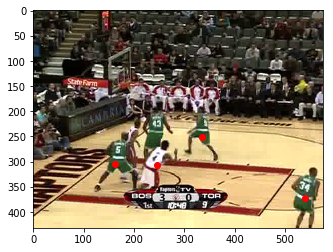

In [14]:
plt.imshow(Image.open(images[-1]))
for box in _boxes:
    x1, y1, x2, y2 = box[:4]
    dotx = (x1 + x2) / 2
    doty = (y1 + y2) / 2 
    plt.plot([dotx], [doty], 'ro')


In [45]:
data = pd.read_csv("./heatmap_results/birds2.csv", header=None)
data.columns = header
data.head(10)

frame_number  abs_bbox_x1  abs_bbox_y1  abs_bbox_x2  abs_bbox_y2  \
0             0   300.435699   373.365173   400.909637   476.403198   
1             0   709.514160   216.958084   836.483643   473.790131   
2             0    77.466919   396.379089   150.493683   491.434418   
3             0   635.229004   245.154037   743.722595   475.006012   
4             0   188.219116   373.394409   336.794098   472.346161   
5             0   432.229828   372.951599   540.888123   445.844055   
6             1   711.214050   216.204987   836.124451   474.238312   
7             1   291.894257   371.284515   402.095032   480.331360   
8             1    75.817665   396.344940   152.177963   492.010986   
9             1   189.744766   372.162354   340.202820   474.169830   

   class_prec  obj_prec  class     emb_1     emb_2   ...    emb_1017  \
0    0.767524  0.999941   14.0 -0.084111 -0.059564   ...   -0.391653   
1    0.745823  0.999128    0.0  1.357264 -0.097658   ...   -0.246698   
2    0.734605  0.999584   14.0 -0.033943 -0.015793   ...   -0.312720   
3    0.675441  0.994922    0.0  1.231442 -0.079350   ...   -0.268177   
4    0.653287  0.999952   14.0 -0.024567 -0.055165   ...   -0.341683   
5    0.604564  0.999322   14.0  1.381413 -0.021230   ...   -0.297374   
6    0.754045  0.999180    0.0  1.306492 -0.102065   ...   -0.236879   
7    0.743322  0.999946   14.0 -0.064810 -0.061921   ...   -0.408629   
8    0.740780  0.999536   14.0 -0.048585 -0.014341   ...   -0.319996   
9    0.679933  0.999956   14.0 -0.023144 -0.060066   ...   -0.351423   

   emb_1018  emb_1019  emb_1020  emb_1021  emb_1022  emb_1023  emb_1024  \
0  1.712348 -0.113869  0.735497 -0.048070  0.704986 -0.358141 -0.097330   
1 -0.047864 -0.047645  0.523409  1.301452 -0.180280 -0.034215 -0.106338   
2  1.272838 -0.099009  0.742040 -0.113454 -0.004358 -0.248850 -0.175375   
3  0.257068 -0.067294  0.825284  0.791982 -0.222362 -0.097144 -0.032271   
4  1.781414 -0.148313  0.827974 -0.025680  0.106709 -0.352539 -0.072708   
5  1.938678 -0.054770  0.332538  0.578805 -0.006816 -0.124407 -0.143055   
6 -0.017710 -0.051644  0.628379  1.111425 -0.189027 -0.027667 -0.079230   
7  1.818333 -0.112450  0.727865 -0.075082  0.965134 -0.360132 -0.140372   
8  1.408954 -0.099104  0.719468 -0.115002 -0.013713 -0.241614 -0.186851   
9  1.820152 -0.144328  0.843829 -0.054556  0.090700 -0.361861 -0.100669   

   cell_y  cell_x  
0    10.0     4.0  
1     8.0    10.0  
2    10.0     1.0  
3     8.0     9.0  
4    10.0     3.0  
5     9.0     6.0  
6     8.0    10.0  
7    10.0     4.0  
8    10.0     1.0  
9    10.0     3.0  

[10 rows x 1034 columns]

In [38]:
data[0].shape

torch.Size([1034])

In [ ]:
for i in data[0]:
    print(float(i))

In [60]:
header = ["frame_number", "abs_bbox_x1", "abs_bbox_y1", "abs_bbox_x2",
          "abs_bbox_y2", "class_prec", "obj_prec", "class"] + ["emb_{}".format(i) for i in range(1, 1025)] + \
         ["cell_y", "cell_x"]

In [23]:
images = sorted([x for x in os.listdir("/data/vot2016/birds2/") if x.endswith("jpg")])

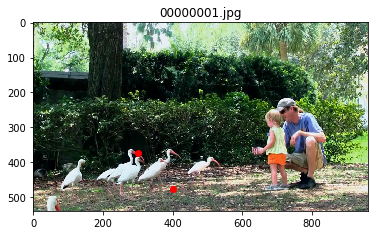

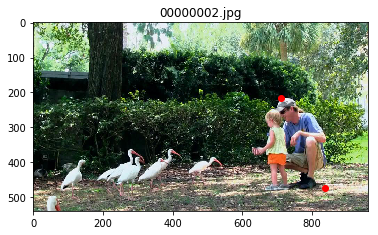

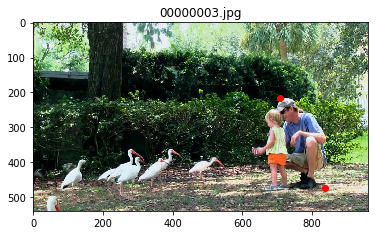

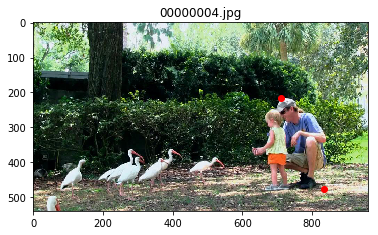

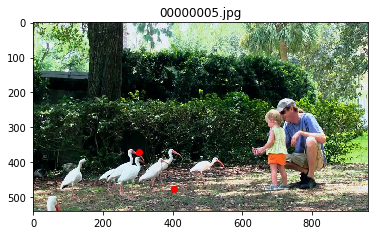

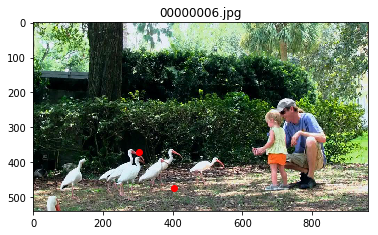

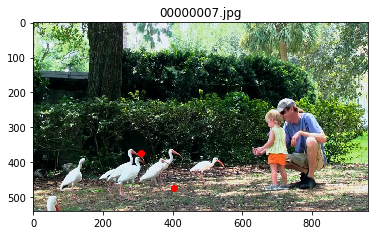

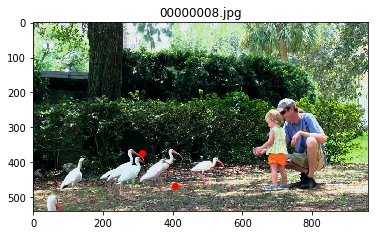

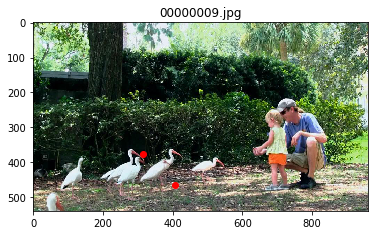

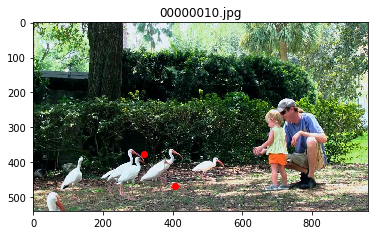

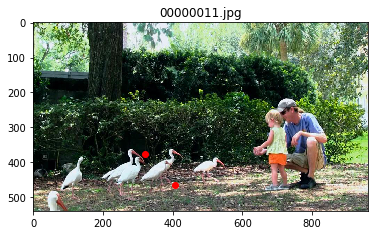

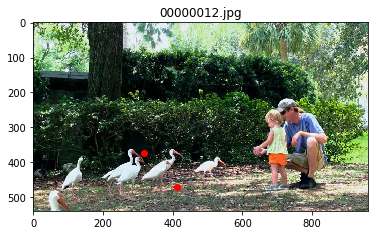

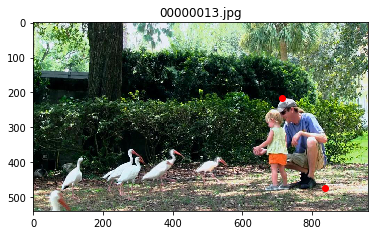

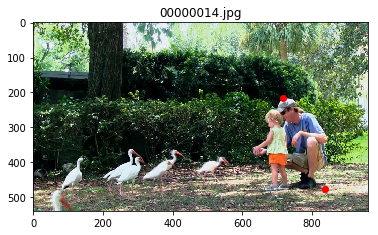

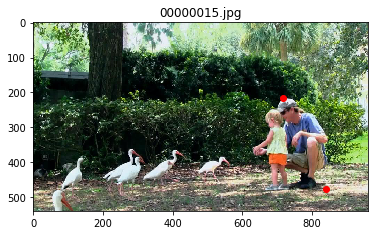

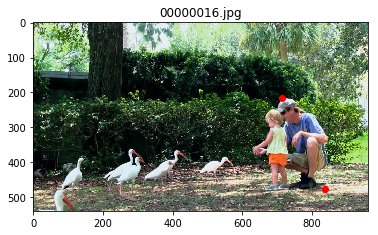

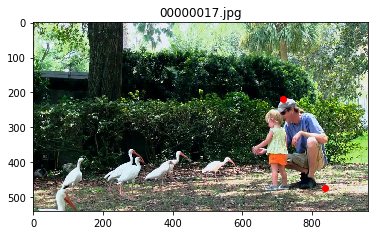

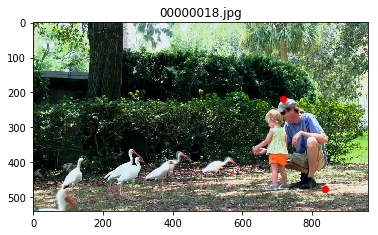

KeyboardInterrupt: 

In [37]:
for n, image in enumerate(images):
    im = Image.open(osp.join("/data/vot2016/birds2", image))
    fig = plt.figure()
    plt.title(image)
    plt.imshow(im)
    box = data[data[:, 0] == float(n)][0]
    plt.plot([box[[1, 3]].tolist()], [box[[2, 4]].tolist()], 'ro')
    
    plt.show()

In [36]:
box[[1, 3]]

tensor([300.4357, 400.9096], device='cuda:0', dtype=torch.float64)

In [46]:
header = pd.DataFrame(header)

In [49]:
header.to("header.csv")

In [74]:
data.columns = pd.read_csv("header.txt", header=None).values[0]

In [75]:
data.head(10)

frame_number  abs_bbox_x1  abs_bbox_y1  abs_bbox_x2  abs_bbox_y2  \
0             0   300.435699   373.365173   400.909637   476.403198   
1             0   709.514160   216.958084   836.483643   473.790131   
2             0    77.466919   396.379089   150.493683   491.434418   
3             0   635.229004   245.154037   743.722595   475.006012   
4             0   188.219116   373.394409   336.794098   472.346161   
5             0   432.229828   372.951599   540.888123   445.844055   
6             1   711.214050   216.204987   836.124451   474.238312   
7             1   291.894257   371.284515   402.095032   480.331360   
8             1    75.817665   396.344940   152.177963   492.010986   
9             1   189.744766   372.162354   340.202820   474.169830   

   class_prec  obj_prec  class     emb_1     emb_2   ...    emb_1017  \
0    0.767524  0.999941   14.0 -0.084111 -0.059564   ...   -0.391653   
1    0.745823  0.999128    0.0  1.357264 -0.097658   ...   -0.246698   
2    0.734605  0.999584   14.0 -0.033943 -0.015793   ...   -0.312720   
3    0.675441  0.994922    0.0  1.231442 -0.079350   ...   -0.268177   
4    0.653287  0.999952   14.0 -0.024567 -0.055165   ...   -0.341683   
5    0.604564  0.999322   14.0  1.381413 -0.021230   ...   -0.297374   
6    0.754045  0.999180    0.0  1.306492 -0.102065   ...   -0.236879   
7    0.743322  0.999946   14.0 -0.064810 -0.061921   ...   -0.408629   
8    0.740780  0.999536   14.0 -0.048585 -0.014341   ...   -0.319996   
9    0.679933  0.999956   14.0 -0.023144 -0.060066   ...   -0.351423   

   emb_1018  emb_1019  emb_1020  emb_1021  emb_1022  emb_1023  emb_1024  \
0  1.712348 -0.113869  0.735497 -0.048070  0.704986 -0.358141 -0.097330   
1 -0.047864 -0.047645  0.523409  1.301452 -0.180280 -0.034215 -0.106338   
2  1.272838 -0.099009  0.742040 -0.113454 -0.004358 -0.248850 -0.175375   
3  0.257068 -0.067294  0.825284  0.791982 -0.222362 -0.097144 -0.032271   
4  1.781414 -0.148313  0.827974 -0.025680  0.106709 -0.352539 -0.072708   
5  1.938678 -0.054770  0.332538  0.578805 -0.006816 -0.124407 -0.143055   
6 -0.017710 -0.051644  0.628379  1.111425 -0.189027 -0.027667 -0.079230   
7  1.818333 -0.112450  0.727865 -0.075082  0.965134 -0.360132 -0.140372   
8  1.408954 -0.099104  0.719468 -0.115002 -0.013713 -0.241614 -0.186851   
9  1.820152 -0.144328  0.843829 -0.054556  0.090700 -0.361861 -0.100669   

   cell_y  cell_x  
0    10.0     4.0  
1     8.0    10.0  
2    10.0     1.0  
3     8.0     9.0  
4    10.0     3.0  
5     9.0     6.0  
6     8.0    10.0  
7    10.0     4.0  
8    10.0     1.0  
9    10.0     3.0  

[10 rows x 1034 columns]

In [64]:
print(",".join(header), file=open("header.txt", "a+"))

In [72]:
data.columns = pd.read_csv("header.txt", header=None).values[0]

In [71]:
pd.read_csv("header.txt", header=None).values

array([['frame_number', 'abs_bbox_x1', 'abs_bbox_y1', ..., 'emb_1024',
        'cell_y', 'cell_x']], dtype=object)